In [1]:
import requests
import pandas as pd
from pandas import DataFrame 
!pip install geopy
from geopy.extra.rate_limiter import RateLimiter


import matplotlib.pyplot as plt
import zipfile
import numpy as np
import io
import time
from pprint import pprint 
print("Import Successful")
#!wget https://www150.statcan.gc.ca/n1/tbl/csv/10100084-eng.zip
#!unzip 10100084-eng.zip

  Using cached geopy-2.0.0-py3-none-any.whl (111 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
Import Successful


# Downloading the data

In [2]:



df = pd.read_csv("TorontoListings.csv")


# Data Cleaning

In [3]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.874600e+04,1.874600e+04,0.0,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,14788.000000,18746.000000,18746.000000
mean,2.673976e+07,1.087340e+08,NaN,43.680717,-79.397420,135.468473,10.786568,26.635602,1.214266,4.715246,125.690761
std,1.298332e+07,1.055992e+08,NaN,0.048263,0.064453,263.761517,36.913904,52.418576,1.597121,10.354866,136.844548
min,1.419000e+03,1.565000e+03,NaN,43.586710,-79.634800,11.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.634553e+07,2.049040e+07,NaN,43.645170,-79.426310,61.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,2.775978e+07,6.787450e+07,NaN,43.662815,-79.397350,99.000000,2.000000,6.000000,0.600000,1.000000,83.000000
75%,3.853432e+07,1.823192e+08,NaN,43.700153,-79.376860,150.000000,7.000000,27.000000,1.580000,3.000000,252.000000
max,4.578971e+07,3.711952e+08,NaN,43.836900,-79.127810,13137.000000,1125.000000,828.000000,15.440000,88.000000,365.000000


From above, We can see there is a column which is empty, Hence, We drop empty, NAN data from the set. 

In [4]:
df.head(300)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,98,180,169,2013-08-27,1.24,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.72,2,240
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,125,21,40,2020-03-20,0.34,2,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1294243,Enjoy Toronto Junction.,1025890,Amir,NaN,Junction Area,43.66711,-79.46453,Entire home/apt,80,365,5,2018-08-19,0.06,1,365
296,1299374,Beaches Butterfly Garden Suite,7065012,Jude,NaN,East End-Danforth,43.67828,-79.30960,Entire home/apt,93,7,62,2019-12-31,0.71,2,35
297,1301516,Luxury on Lake 2 Stories Penthouse,6169934,Fahad,NaN,Niagara,43.63531,-79.40055,Entire home/apt,643,30,8,2014-07-02,0.09,2,365
298,1301718,Uber Upper Beach 3 Bedroom Suite,377846,Nick & Nena,NaN,East End-Danforth,43.68345,-79.29434,Entire home/apt,107,7,21,2020-10-17,0.27,10,238


In [5]:

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Since id and host_name, both are giving the same information, We keep one of them and We will do the same thing for name and coordination(lattitude+longitude), We will concatenate them into coulumn location

In [6]:
df['location'] = [', '.join(str(x) for x in y) for y in map(tuple, df[['latitude', 'longitude']].values)]
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0,"43.64617, -79.42451"
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,98,180,169,2013-08-27,1.24,2,365,"43.64105, -79.37628000000001"
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0,"43.66724, -79.41598"
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.72,2,240,"43.696020000000004, -79.45468000000001"
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,125,21,40,2020-03-20,0.34,2,295,"43.6453, -79.3894"
5,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,54,120,26,2011-08-30,0.21,1,0,"43.6689, -79.32592"
6,28160,"Luxury, Safety, Affordability For Women Travel...",86838,Rita,NaN,Mount Pleasant West,43.70376,-79.39077,Entire home/apt,50,60,7,2018-10-17,0.11,1,364,"43.703759999999996, -79.39076999999999"
7,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64151,-79.37643,Entire home/apt,131,180,1,2010-08-11,0.01,2,365,"43.64151, -79.37643"
8,40456,Downtown 2 Bdr.Apt with King Size Bed and Par...,174063,Denis,NaN,South Parkdale,43.63532,-79.44049,Entire home/apt,100,30,110,2020-03-25,0.88,5,359,"43.63532, -79.44049"
9,41887,Great location,183071,Kyle,NaN,Oakridge,43.69466,-79.28667,Entire home/apt,75,28,82,2019-09-02,1.74,2,342,"43.69466, -79.28667"


In [7]:
df.drop(['neighbourhood_group', 'name', 'host_name'], 1, inplace = True)
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location
0,1419,1565,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0,"43.64617, -79.42451"
1,8077,22795,Waterfront Communities-The Island,43.64105,-79.37628,Private room,98,180,169,2013-08-27,1.24,2,365,"43.64105, -79.37628000000001"
2,12604,48239,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0,"43.66724, -79.41598"
3,23691,93825,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.72,2,240,"43.696020000000004, -79.45468000000001"
4,26654,113345,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,125,21,40,2020-03-20,0.34,2,295,"43.6453, -79.3894"


# taking care of missing data

In [8]:
df = df[['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type','minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'location', 'price']]
cols = list(df.columns.values)
print(cols)
df.head()


['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'location', 'price']


,id,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location,price
0,1419,1565,Little Portugal,43.64617,-79.42451,Entire home/apt,4,7,2017-12-04,0.11,1,0,"43.64617, -79.42451",469
1,8077,22795,Waterfront Communities-The Island,43.64105,-79.37628,Private room,180,169,2013-08-27,1.24,2,365,"43.64105, -79.37628000000001",98
2,12604,48239,Annex,43.66724,-79.41598,Private room,1,0,NaN,NaN,1,0,"43.66724, -79.41598",66
3,23691,93825,Briar Hill-Belgravia,43.69602,-79.45468,Private room,1,217,2019-12-22,1.72,2,240,"43.696020000000004, -79.45468000000001",70
4,26654,113345,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,21,40,2020-03-20,0.34,2,295,"43.6453, -79.3894",125


In [9]:
# count the number of missing values for each column
num_missing = (df[['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'location', 'price']] == 0).sum()
# report the results
print(num_missing)

id                                   0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                 3958
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                  6641
location                             0
price                                0
dtype: int64


In [10]:
# replace '0' values with 'nan'
from numpy import nan
df[['number_of_reviews', 'availability_365']] = df[['number_of_reviews', 'availability_365']].replace(0, nan)
# count the number of nan values in each column
print(df.isnull().sum())

id                                   0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                 3958
last_review                       3958
reviews_per_month                 3958
calculated_host_listings_count       0
availability_365                  6641
location                             0
price                                0
dtype: int64


In [11]:
#conversion of the 'REF_DATE' from a string to a proper datetime object.
df['last_review'] = pd.to_datetime(df['last_review']) 
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)
# count the number of NaN values in each column
print(df.isnull().sum())


<ipython-input-11-0c8b10ad8c6d>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


id                                   0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       3958
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
location                             0
price                                0
dtype: int64


# Encoding categorical Data

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X=df.iloc[: , 5:12].values
y=df.iloc[:, 13].values
one_hot = pd.get_dummies(df['room_type'])
print(one_hot)

       Entire home/apt  Hotel room  Private room  Shared room
0                    1           0             0            0
1                    0           0             1            0
2                    0           0             1            0
3                    0           0             1            0
4                    1           0             0            0
...                ...         ...           ...          ...
18741                1           0             0            0
18742                1           0             0            0
18743                1           0             0            0
18744                0           0             1            0
18745                1           0             0            0

[18746 rows x 4 columns]


In [13]:
merged_df = pd.concat([df, one_hot], axis=1)
print(merged_df)

             id    host_id                      neighbourhood  latitude  \
0          1419       1565                    Little Portugal  43.64617   
1          8077      22795  Waterfront Communities-The Island  43.64105   
2         12604      48239                              Annex  43.66724   
3         23691      93825               Briar Hill-Belgravia  43.69602   
4         26654     113345  Waterfront Communities-The Island  43.64530   
...         ...        ...                                ...       ...   
18741  45785334    1023135                     Yonge-Eglinton  43.70703   
18742  45786222  371188170                   Newtonbrook East  43.79075   
18743  45786961  371195218                    Bayview Village  43.76668   
18744  45789233  304805850             Corso Italia-Davenport  43.67330   
18745  45789708  344709977                            Niagara  43.64481   

       longitude        room_type  minimum_nights  number_of_reviews  \
0      -79.42451  Entire ho

In [14]:
#merged_df.drop(['room_type'], 1, inplace = True)
merged_df.columns

Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'location', 'price', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room'],
      dtype='object')

In [15]:
merged_df = merged_df[['id', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'location', 'Shared room', 'Entire home/apt',
       'Hotel room', 'Private room', 'price']]


,id,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location,price
0,1419,1565,Little Portugal,43.64617,-79.42451,Entire home/apt,4,7.000000,2017-12-04,0.110000,1,194.646758,"43.64617, -79.42451",469
1,8077,22795,Waterfront Communities-The Island,43.64105,-79.37628,Private room,180,169.000000,2013-08-27,1.240000,2,365.000000,"43.64105, -79.37628000000001",98
2,12604,48239,Annex,43.66724,-79.41598,Private room,1,33.764606,NaT,1.214266,1,194.646758,"43.66724, -79.41598",66
3,23691,93825,Briar Hill-Belgravia,43.69602,-79.45468,Private room,1,217.000000,2019-12-22,1.720000,2,240.000000,"43.696020000000004, -79.45468000000001",70
4,26654,113345,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,21,40.000000,2020-03-20,0.340000,2,295.000000,"43.6453, -79.3894",125


In [29]:
#merged_df.drop(['last_review'], 1, inplace = True)
#merged_df.drop(['location'], 1, inplace = True)
merged_df.head()

,id,host_id,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Shared room,Entire home/apt,Hotel room,Private room,price
0,1419,1565,Little Portugal,43.64617,-79.42451,4,7.000000,0.110000,1,194.646758,0,1,0,0,469
1,8077,22795,Waterfront Communities-The Island,43.64105,-79.37628,180,169.000000,1.240000,2,365.000000,0,0,0,1,98
2,12604,48239,Annex,43.66724,-79.41598,1,33.764606,1.214266,1,194.646758,0,0,0,1,66
3,23691,93825,Briar Hill-Belgravia,43.69602,-79.45468,1,217.000000,1.720000,2,240.000000,0,0,0,1,70
4,26654,113345,Waterfront Communities-The Island,43.64530,-79.38940,21,40.000000,0.340000,2,295.000000,0,1,0,0,125


# Linear regression feature importance 

Feature: 0, Score: 0.15156
Feature: 1, Score: 0.00126
Feature: 2, Score: -5.71162
Feature: 3, Score: -0.30238
Feature: 4, Score: 0.07744
Feature: 5, Score: -8.91699
Feature: 6, Score: 101.85296
Feature: 7, Score: 42.93719


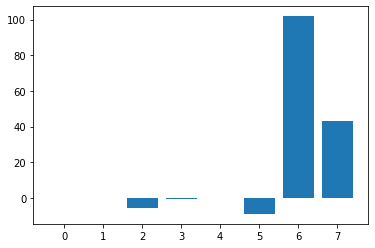

In [39]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X=merged_df.iloc[: , 5:13].values
y=merged_df.iloc[:, 14].values
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
#define the model
model = LinearRegression()
# fit the model
time.sleep(0.1) 
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()